In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
data = pd.merge(transactions, customers, on='CustomerID')

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].fillna(data[numeric_cols].mean(), inplace=True)



In [11]:
features = data.groupby('CustomerID').agg({
    'Price': 'mean',
    'ProductID': 'nunique',
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.drop('CustomerID', axis=1))

In [13]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
features['Cluster'] = clusters

Davies-Bouldin Index: 1.0138195757502033


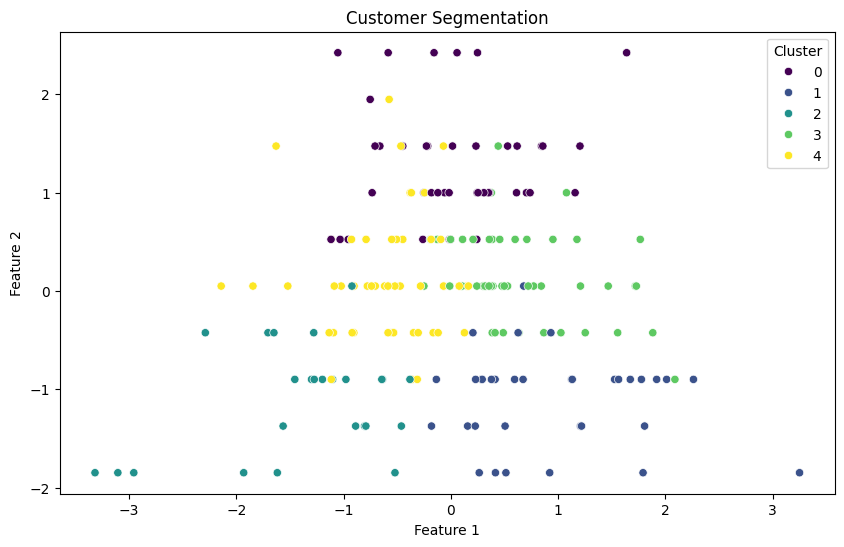

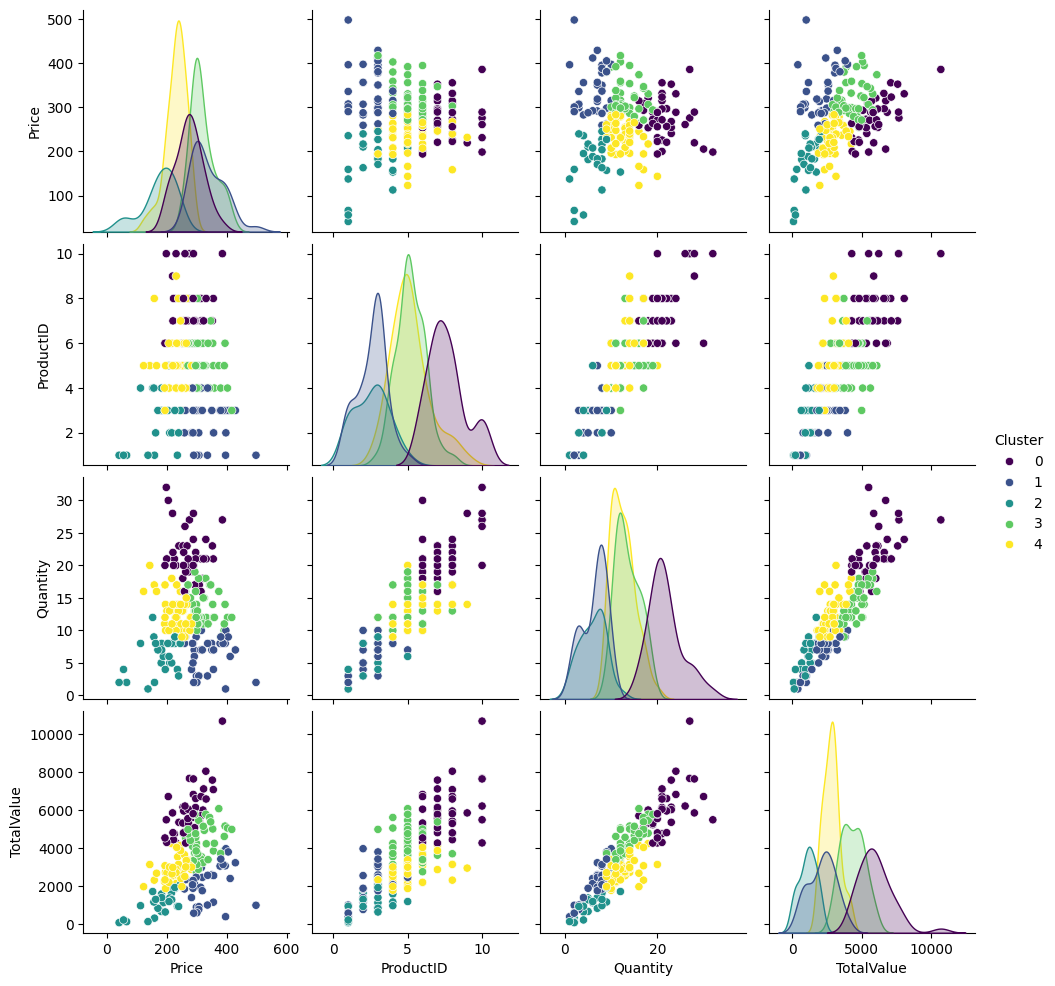

In [14]:
db_index = davies_bouldin_score(features_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segmentation') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

sns.pairplot(features, hue='Cluster', palette='viridis')
plt.show()